<img src="assets/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis


---

## Learning Objectives

- Define what pandas is and how it relates to data science
- Manipulate pandas `DataFrames` and `Series`
- Filter and sort data using pandas
- Manipulate `DataFrame` columns
- Group and aggregate data
- Handle null and missing values

<a id="home"></a>

## Lesson Guide

- [a) What is pandas?](#pandas)

- [b) Reading Files, Selecting Columns, and Summarizing](#reading-files)
    - [i) Examine the data](#examine)
    - [ii) Summarise (describe) the data](#summarise)
    - [iii) Count the occurrences of each value (category) within a column](#count_occurrences)
    - [iv) Exercise 1](#exercise-one)
    
    
- [c) Filtering and Sorting](#filtering-and-sorting)
    - [i) Filtering with one condition](#filtering_one)
    - [ii) Filtering with multiple conditions](#filtering_multiple)
    - [iii) Sorting](#sorting)
    - [iv) Exercise 2](#exercise-two)
    
    


- [d) Renaming, Adding, and Removing Columns](#columns)
    - [i) Easy Column Operations](#column_ops)
    - [ii) Removing Columns](#removing_cols)


- [e) Handling Missing Values](#missing-values)
    - [i) Understanding pandas Axis](#axis)
    - [ii) Find missing values in a `DataFrame`](#missing_values)
    - [iii) Dropping Missing Values](#drop_missing_values)
    - [iv) Filling Missing Values](#fill_missing_values)
    - [v) Exercise 3](#exercise-three)
    
    
- [f) Grouping and aggregating data: Split-Apply-Combine](#split-apply-combine)
    - [i) Exercise 4](#exercise-four)
    
    


- [g) Selecting Multiple Columns and Filtering Rows](#multiple-columns)
    - [i) `loc`: select columns by name](#loc)
    - [ii) `iloc`: select columns by integer position](#iloc)


- [h) Joining (Merging) DataFrames](#joining-dataframes)


- [i) OPTIONAL: Other Commonly Used Features](#other-features)
- [j) OPTIONAL: Other Less Used Features of Pandas](#uncommon-features)
- [k) Summary](#summary)

## <font style='color: red'>But first...</font>

### ...where are we in the Data Science Workflow?

<br />

<img src="assets/ds_workflow_prep_analyse.png" style="width: 700px;">

<br />

<a id="pandas"></a>

# <font style='color: blue'>a) What is pandas?</font>

- **Objective:** Define what pandas is and how it relates to data science.




pandas is a Python library that primarily adds two new <font style='color: red'>datatypes</font> to Python: `DataFrame` and `Series`.

It was developed by Wes McKinney in 2008, primarily to help him analyse financial data in the hedge fund he worked for at the time. The pandas name itself "...is derived from panel data, an econometrics term for multidi- mensional structured data sets, and Python data analysis itself." (Source: Python for Data Analysis, Wes McKinney)

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).


Here is what a typical pandas `DataFrame` looks like:

<img src="assets/dataframe_eg.png" style="width: 500px;">

_**Source**: Python for Data Analysis, Wes McKinney_




> Behind the scenes, these `DataFrame` and `Series` datatypes use the NumPy (Numerical Python) library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:
> - Each element has the same datatype (typically fixed-size, e.g. a 32-bit integer)
> - Elements are stored contiguously (immediately after each other) in memory for fast retrieval
> - The total size of an `ndarray` is fixed

> Storing `Series` and `DataFrame` data in `ndarray`s makes pandas faster and uses less memory than standard Python datatypes. Many libraries (such as [scikit-learn](https://scikit-learn.org/stable/)) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.




### Using pandas

pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

<font style='color: red'> pandas is a large library that typically takes a lot of practice to learn.</font> It heavily overrides Python operators, resulting in odd-looking syntax. 

For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. 


To do this in pandas, we might write: `cars[cars['mpg'] > 35]`. In standard Python, this would most likely give a syntax error. 



pandas also highly favors certain patterns of use. 

For example, looping through a `DataFrame` row by row is highly discouraged as it can be slow, especially when you are processing a **lot** of data. 

Instead, pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)  (We will cover vectors in a future class.)

Do not be discouraged if pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "pandas way" of thinking about and manipulating data.

### Class Methods and Attributes

Pandas `DataFrame`s are Pandas class objects and therefore come with attributes and methods. 

To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable
- users.head()      # calls the `head` method (since there are open/closed parentheses)
- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:
- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

From the above, we can know that the `head` method accepts one parameter with an optional name of `n` because it is in the documentation for that method. Let's see how to view the documentation next.



You don't need to know any more about Classes, attributes or methods for this session, but it is very useful to know a bit more about what they are and how they work, as they are core to extensive Python coding and Object Oriented Programming in general.  You can find out more on [Tutorials Point](https://www.tutorialspoint.com/python3/python_classes_objects.htm) and on [Towards Data Science](https://towardsdatascience.com/introduction-to-python-classes-da526ff745df).

### Viewing Documentation

There are a few ways to find more information about a method.

**Option 1:** view the comprehensive [pandas documentation](https://pandas.pydata.org/docs/index.html)



**Option 2:** In Jupyter, you can quickly view documentation for a method by following the method name by a `?`, as follows:

```
users.head?
```

> ```
Signature: users.head(n=5)
Docstring: Returns first n rows
```

Notice that we would normally invoke this method by calling `users.head(5)`. One quirk of Jupyter is that the `?` symbol must be the last character in the cell. Otherwise, it might not work.

> The `?` is a shortcut for the built-in Python function `help`, which returns the method's docstring. For example:
> ```
help(users.head)
```



**Option 3:** You can also search online for the phrase "`DataFrame head`", since you are calling the method `head` on the `users` object, which happens to be a `DataFrame`. (`type(users) => pandas.DataFrame`)

You can alternatively search online for `pandas head`, but be careful! `DataFrame` and `Series` both have a `head` method, so make sure you view the documentation for the correct one since they might be called differently. You will know you are looking at the correct documentation page because it will say `DataFrame.head` at the top, instead of `Series.head`.

## Import pandas

In [1]:
# Load pandas into Python, and matplotlib too, which is a commonly used data visualization
# library used in Python (we'll look at it in depth in the next Session)

import pandas as pd
import matplotlib.pyplot as plt

#%matplotlib inline

<a id="reading-files"></a>
# <font style='color: blue'>b) Reading Files, Selecting Columns, and Summarizing</font>

- **Objective:** Read files, select specific columns, and summarise the data in the DataFrame depending on data type

In [2]:
# How to read a file into Jupyter using pandas
# .tbl is a table file.  You don't need to know about them for this course - we won't use
# them much

users = pd.read_csv('./data/user.tbl', sep='|')

# This has created a DataFrame object called 'users', which we will now explore

<a id="examine"></a>
### <font style='color: orange'>i) Examine the data</font>

In [3]:
users                   # Print the first few and last few rows of the DataFrame.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [4]:
type(users)             # DataFrame

pandas.core.frame.DataFrame

In [5]:
users.head()            # Print the first five rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
users.head(10)          # Print the first 10 rows; you can specify the number to show (default=5)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [8]:
users.tail()            # Print the last five rows (same as head(), with default =5).

,user_id,age,gender,occupation,zip_code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [6]:
# The row index (aka "the row labels" — in this case integers)
# Notice the syntax of the output: where have we seen that before?
    
users.index            

RangeIndex(start=0, stop=943, step=1)

In [7]:
# Column names (which is "an index")
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [10]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype.
# 'int64' stands for '64 bit integer', essentially an integer with 64 bits of memory allocated
# 'object' is effectively a non-number, so can be text, or the column can contain a mixture of
# text and numbers.  It is the lowest common denominator dtype

users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [11]:
# Number of rows and columns.  You can (zero) index this, similar to lists and strings

users.shape

(943, 5)

In [12]:
# All values in the table, presented as a numPy array with each array being a row of data)
# Challenge: how do you think we might be able to get the column headers, without using .columns...
# (based on the Python we've learnt)?

users.values

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ...,
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], dtype=object)

In [13]:
# Concise summary (including memory usage) — useful to quickly see if nulls exist, along
# with the shape of the DataFrame, the columns in it, and the dtype of each column

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


**Select or index data**

<br />
pandas `DataFrame`s have structural similarities with Python-style lists and dictionaries.  
In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [14]:
users.shape

(943, 5)

In [8]:
# Select a column and show its shape — returns a pandas Series (essentially an ndarray
# with an index)

users['gender'].shape

(943,)

In [18]:
# Each column in a DataFrame is a pandas Series

users['gender']

0      M
1      F
2      M
3      M
4      F
      ..
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

In [ ]:
# You can make them a DataFrame by using double square brackets

users[['gender']]

In [19]:
# Select one column using the DataFrame attribute.

users.gender

# While a useful shorthand, these attributes only exist
# if the column name has no punctuations or spaces.

0      M
1      F
2      M
3      M
4      F
      ..
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

<a id="summarise"></a>
### <font style='color: orange'>ii) Summarise (describe) the data.</font>

pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding.

In [20]:
# Describe all numeric columns using core descriptive statisticss.

users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [21]:
# Describe all object columns (can include multiple types).

users.describe(include=['object'])

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [22]:
# Assign a view of the data - in this .describe of non-numeric data - to a variable
# (new DataFrame)

a = users.describe(include=['object'])
print(type(a))
a.head()

<class 'pandas.core.frame.DataFrame'>


,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [23]:
# You can add columns of data to a DataFrame in a similar way to adding data to Python dictionaries

a['zip_code'] = [len(a.zip_code), 19, 45, 29]

In [24]:
a

,gender,occupation,zip_code
count,943,943,4
unique,2,21,19
top,M,student,45
freq,670,196,29


In [25]:
# Describe all columns, including non-numeric.

users.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [ ]:
# Describe a single column — recall that "users.gender" refers to a Series.
users.gender.describe()

In [26]:
# Calculate the mean of the ages.  Note that mean() here is a pandas method
users['age'].mean()

34.05196182396607

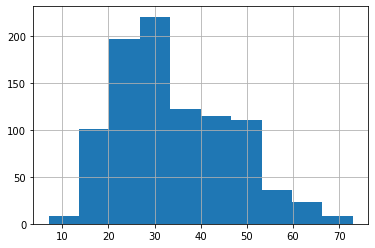

In [27]:
# Draw a histogram of a column (the distribution of ages).  This uses an inbuilt pandas method,
# *not* the matplotlib library directly.  i.e. you don't have to import matplotlib to run this

users.age.hist();

<a id="count_occurrences"></a>
### <font style='color: orange'>iii) Count the number of occurrences of each value (category) within a column</font>

In [28]:
users.gender.value_counts()     # Most useful for categorical variables

M    670
F    273
Name: gender, dtype: int64

In [29]:
users.gender.value_counts(normalize=True)     # normalize parameter shows % of column

M    0.710498
F    0.289502
Name: gender, dtype: float64

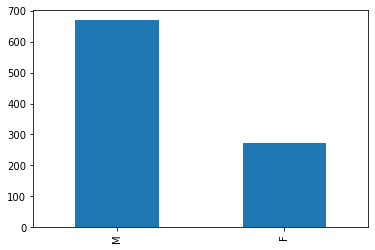

In [30]:
users.gender.value_counts().plot(kind='bar');    # Quick plot by category

In [31]:
# Can also be used with numeric variables
# Try .sort_index() to sort by indices or .sort_values() to sort by counts.

users.age.value_counts()

30    39
25    38
22    37
28    36
27    35
      ..
7      1
66     1
10     1
11     1
73     1
Name: age, Length: 61, dtype: int64

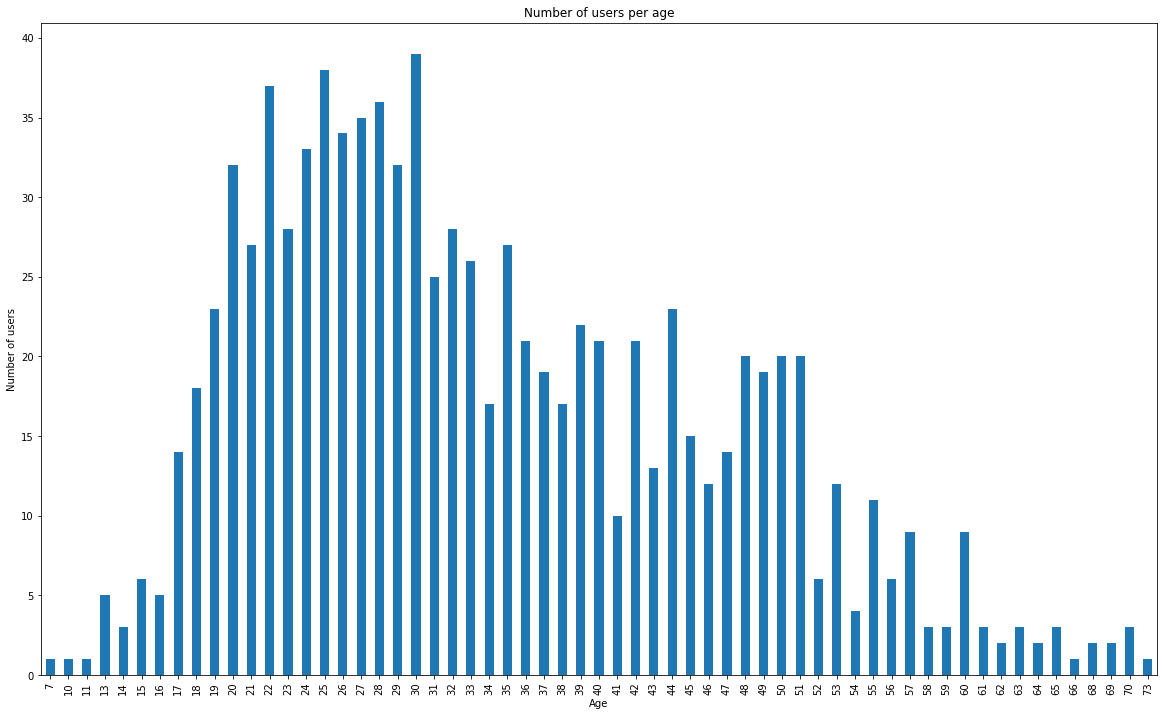

In [35]:
users.age.value_counts().sort_index().plot(kind='bar', figsize=(20,12));     # Bigger plot by increasing age
plt.xlabel('Age')
plt.
plt.ylabel('Number of users');
plt.title('Number of users per age');

<a id="exercise-one"></a>
### <font style='color: green'>iv) Exercise 1</font>

### Read drinks.csv into a DataFrame called "drinks".


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

drinks = pd.read_csv('./data/drinks.csv')

### Print the head and the tail.

In [12]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [14]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


### Examine the default index, datatypes, and shape.

In [16]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [18]:
drinks.shape

(193, 6)

In [20]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [22]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [26]:
drinks['beer_servings']

0        0
1       89
2       25
3      245
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Name: beer_servings, Length: 193, dtype: int64

### Print the beer_servings Series.


### Calculate the average beer_servings for the entire data set.


In [27]:
drinks.beer_servings.mean()

106.16062176165804

### Count the number of occurrences of each 'continent' value and see if it looks correct


In [29]:
drinks['continent'].value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

### Does not look correct - investigate the 'continent' column


In [36]:
drinks.describe(include='object')

,country,continent
count,193,170
unique,193,5
top,Norway,AF
freq,1,53


### What's happened to North America?

<a id="filtering-and-sorting"></a>
# <font style='color: blue'>c) Filtering and Sorting</font>

- **Objective:** Filter and sort data using Pandas.

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

<a id="filtering_one"></a>
### <font style='color: orange'>i) Logical filtering with one condition</font>

In [10]:
# To filter with one condition, pandas performs a Boolean evaluation on each row of data...

# Only show users with age < 20:

users['age'] < 20

0      False
1      False
2      False
3      False
4      False
       ...  
938    False
939    False
940    False
941    False
942    False
Name: age, Length: 943, dtype: bool

In [11]:
# ... and uses that Series of Bool values to filter rows.
# In pandas, indexing a DataFrame by a Series of Booleans only selects rows that are True
# in the Boolean.

users_filter = users.age < 20
users[users_filter].head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402


In [ ]:
# You could do this in one line of code, but for readability it is often better to use a
# filter, or 'mask' as it's commonly known (`filter` is a Python keyword - like `print`, so
# shouldn't be used on its own)

users[users.age < 20].head()

In [ ]:
mask = users['occupation'] == 'student'
student_frame = users[mask]

student_frame.head()

 Important: filtering creates a view of the original DataFrame, *not* a new DataFrame.

 BUT...if you store a view as a new variable you create a new DataFrame of that data. Changing
 data in that variable will change data in your new DataFrame *only*, not in the original.
 Here, notice that pandas gives you a SettingWithCopyWarning to alert you of this.

 It is best practice to use .loc and .iloc instead of the syntax below.  We will learn about
 these later today in k) Selecting Multiple Columns and Filtering Rows.


In [ ]:

student_frame['age'] = 12

In [ ]:
# Check that the above changes have been made.  Notice that this is a subset of the original
# DataFrame

student_frame

Learn more about [SettingWithCopyWarning](https://www.dataquest.io/blog/settingwithcopywarning/) and what it means. It doesn't mean an error has occurred, but it **does** warn you that what you've done may not be what you expected

In [39]:
# Select one column from the filtered results and set the values in that column.

users.loc[3, 'age'] = 12

In [40]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,12,M,technician,43537
4,5,33,F,other,15213


In [41]:
# value_counts of resulting Series

users.age.unique()

array([24, 53, 23, 12, 33, 42, 57, 36, 29, 39, 28, 47, 45, 49, 21, 30, 35,
       40, 26, 25, 32, 41,  7, 38, 20, 19, 27, 18, 22, 37, 16, 50, 31, 51,
       17, 48, 34, 43, 60, 55, 15, 61, 44, 54, 59, 46, 13, 52, 56, 14, 66,
       62, 11, 65, 68, 63, 64, 10, 73, 58, 69, 70], dtype=int64)

<a id="filtering_multiple"></a>
### <font style='color: orange'>ii) Logical filtering with multiple conditions</font>

If we want to filter with multiple conditions in pandas, we need to use new syntax: `&` for `and` logic, and `|` for `or` logic (and `~` for `not`).  

This is because in Python when we use `and` we evaluate both parts of one scalar to be either True or False (Boolean), whereas when we filter a dataset in pandas we are asking whether each element is True or False (in some cases it will be true, and in others it will be false).  


This element-wise evaluation produces 1s and 0s instead of Trues / Falses, and evaluating multiple rows with one condition is known as 'bit-wise' `AND` (or `OR` or `NOT`) evaluation.

This is Boolean evaluation (evaluating a piece of data) vs element-wise (evaluating >1 piece of data with the same condition).

In [42]:
# Let's switch back to the drinks data

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


mask = (drinks.beer_servings > 25) & (drinks.continent == 'EU')

print('Output - the number of countries: ' +str(drinks[mask].shape[0]))

In [12]:
# Ampersand for `AND` condition. (This is a "bitwise" `AND`.)
# Important: You MUST put parentheses around each expression because `&` has a higher
# precedence than `>`, meaning the logic will not execute the way you intend it.

# Filter dataset by beer_servings being more than 25 in a country, for countries in the EU.
# Answer: 41 countries

mask = (drinks.beer_servings > 25) & (drinks.continent == 'EU')

print('Output - number of countries: ' + str(drinks[mask].shape[0]))
drinks[(drinks.beer_servings > 25) & (drinks.continent == 'EU')].head()

Output - number of countries: 41


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
9,Austria,279,75,191,9.7,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU


In [49]:
# Pipe for `OR` condition. (This is a "bitwise" `OR`.)
# Important: You MUST put parentheses around each expression because `|` has a higher
# precedence than `>`.

# Filter dataset by beer_servings being more than 25 in a country, or wine_servings being
# greater than 200.  Answer: 134 countries

mask = (drinks.beer_servings > 25) | (drinks.wine_servings > 200)
print('Output - number of countries: ' + str(drinks[mask].shape[0]))
drinks[mask].head()

Output - number of countries: 134


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA


In [50]:
# You can combine `AND` with `OR` statements.

mask = (drinks.beer_servings > 25) & ((drinks.continent == 'EU') | (drinks.wine_servings > 200))
drinks[mask].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
6,Argentina,193,25,221,8.3,SA
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [59]:
# Preferred alternative to multiple `OR` conditions when using categorical data

drinks_filter = drinks.continent.isin(['EU', 'SA'])

drinks[drinks_filter]

# notice that you can change the order of the columns you present back

drinks[drinks_filter][['continent', 'country', 'total_litres_of_pure_alcohol']]

,continent,country,total_litres_of_pure_alcohol
1,EU,Albania,4.9
3,EU,Andorra,12.4
6,SA,Argentina,8.3
7,EU,Armenia,3.8
9,EU,Austria,9.7
10,EU,Azerbaijan,1.3
15,EU,Belarus,14.4
16,EU,Belgium,10.5
20,SA,Bolivia,3.8
21,EU,Bosnia-Herzegovina,4.6


In [15]:
drinks[drinks.continent.isna()][['continent', 'country', 'total_litres_of_pure_alcohol']]

,continent,country,total_litres_of_pure_alcohol
5,NaN,Antigua & Barbuda,4.9
11,NaN,Bahamas,6.3
14,NaN,Barbados,6.3
17,NaN,Belize,6.8
32,NaN,Canada,8.2
41,NaN,Costa Rica,4.4
43,NaN,Cuba,4.2
50,NaN,Dominica,6.6
51,NaN,Dominican Republic,6.2
54,NaN,El Salvador,2.2


More detail on [isin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)

<a id="sorting"></a>
### <font style='color: orange'>iii) Sorting</font>

In [61]:
# Sort a Series by its contents.
users.age.sort_values()

29      7
470    10
288    11
3      12
627    13
       ..
584    69
766    70
859    70
802    70
480    73
Name: age, Length: 943, dtype: int64

In [62]:
# sort same data in descending order

users.age.sort_values(ascending = False)

480    73
802    70
766    70
859    70
584    69
       ..
879    13
3      12
288    11
470    10
29      7
Name: age, Length: 943, dtype: int64

In [63]:
# alternative syntax.  `inplace` means that the DataFrame is permanently changed within this session

users.sort_values('age', inplace=True)

In [68]:
users.age.sort_values(inplace=True).copy()

ValueError: This Series is a view of some other array, to sort in-place you must create a copy

If you wanted to use the `users.age.sort_values(inplace=True)` syntax, you would get an error message saying you need to make a copy of the series first.

To do this, you need to use `.copy()` as otherwise the new variable will still be part of the original DataFrame.  See below for an example

In [60]:
id(users.age)

2394044154352

In [69]:
# Assign the Series to a variable.  It is still part of the original DataFrame...

g = users.age
id(g)

2394044890032

In [70]:
# ...which throws an error when you run it.

g.sort_values(inplace = True)

ValueError: This Series is a view of some other array, to sort in-place you must create a copy

In [71]:
# Instead, create a copy of the original Series.  This will be a new object

f = users.age.copy()
# users.sort_values('age')
# id(f)

f

29      7
470    10
288    11
3      12
627    13
       ..
584    69
766    70
859    70
802    70
480    73
Name: age, Length: 943, dtype: int64

In [ ]:
# Then you can sort values inplace

f.sort_values(ascending=False, inplace = True)
f

In [72]:
# Use descending order instead


users.sort_values('age', ascending=False).head()

,user_id,age,gender,occupation,zip_code
480,481,73,M,retired,37771
802,803,70,M,administrator,78212
859,860,70,F,retired,48322
766,767,70,M,engineer,00000
584,585,69,M,librarian,98501


In [73]:
# Sort by multiple columns.  Specify priority of sorting, and relative criteria

users.sort_values(['occupation', 'age'], ascending = [True, False]).head()

,user_id,age,gender,occupation,zip_code
802,803,70,M,administrator,78212
265,266,62,F,administrator,78756
818,819,59,M,administrator,40205
130,131,59,F,administrator,15237
6,7,57,M,administrator,91344


<a id="exercise-two"></a>
### <font style='color: green'>iv) Exercise 2</font>

Use the `drinks.csv` or `drinks` `DataFrame` from earlier to complete the following.

In [88]:
# Filter DataFrame to only include European countries.

drinks[drinks['continent'] == 'EU']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [89]:
# Filter DataFrame to only include European countries with wine_servings > 300.

drinks[(drinks['continent'] == 'EU') & (drinks['wine_servings'] > 300)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [91]:
# Calculate the average beer_servings for all of Europe.

drinks[drinks['continent'] == 'EU']['beer_servings'].mean()

193.77777777777777

In [97]:
# Determine which 10 countries have the highest total_litres_of_pure_alcohol.

big_drinkers = drinks.nlargest(10, 'total_litres_of_pure_alcohol')
big_drinkers

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU
61,France,127,151,370,11.8,EU
141,Russian Federation,247,326,73,11.5,AS
81,Ireland,313,118,165,11.4,EU
99,Luxembourg,236,133,271,11.4,EU
155,Slovakia,196,293,116,11.4,EU


<a id="columns"></a>
# <font style='color: blue'>d) Renaming, Adding, and Removing Columns</font>

- **Objective:** Manipulate `DataFrame` columns.

In [85]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [99]:
# Print the column labels

drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [103]:
# Rename one or more columns in a single output using value mapping.

drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'})

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [104]:
# Rename one or more columns in the original DataFrame.

drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'}, inplace=True)

In [20]:
# Replace all column names using a list of matching length.

drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent'] 


# Replace during file reading (disables the header from the file and uses `names` for the column names).

#drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols)


drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols)
drinks

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [115]:
columns = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']

drinks = pd.read_csv('./data/drinks.csv', header=0, names=columns)

In [116]:
drinks.head()
drinks.columns

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [113]:
# Replace after file has already been read into Python.

drinks.columns = ['1','2','3','4','5','6']
drinks.columns
drinks.head()

,1,2,3,4,5,6
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


<a id="column_ops"></a>
### <font style='color: orange'>i) Easy Column Operations</font>

Rather than having to reference indexes and create `for` loops to do column-wise operations, pandas is smart and knows that when we add columns together we want to add the values in each row together.

In [24]:
# Add a new column as a function of existing columns.
#drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
#drinks['mL'] = drinks.liters * 1000

drinks['beer_plus_wine'] = (drinks['beer'] + drinks['wine']) / drinks['liters'].astype(int)


drinks.head()

,country,beer,spirit,wine,liters,continent,beer_plus_wine
0,Afghanistan,0,0,0,0.0,AS,NaN
1,Albania,89,132,54,4.9,EU,35.750000
2,Algeria,25,0,14,0.7,AF,inf
3,Andorra,245,138,312,12.4,EU,46.416667
4,Angola,217,57,45,5.9,AF,52.400000


In [118]:
# convert a column's datatype to integer (from float)

drinks['mL'] = drinks['mL'].astype(int)

drinks.head()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0
1,Albania,89,132,54,4.9,EU,275,4900
2,Algeria,25,0,14,0.7,AF,39,700
3,Andorra,245,138,312,12.4,EU,695,12400
4,Angola,217,57,45,5.9,AF,319,5900


<a id="removing_cols"></a>
### <font style='color: orange'>ii) Removing Columns</font>

In [119]:
drinks.head(15)

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0
1,Albania,89,132,54,4.9,EU,275,4900
2,Algeria,25,0,14,0.7,AF,39,700
3,Andorra,245,138,312,12.4,EU,695,12400
4,Angola,217,57,45,5.9,AF,319,5900
5,Antigua & Barbuda,102,128,45,4.9,NaN,275,4900
6,Argentina,193,25,221,8.3,SA,439,8300
7,Armenia,21,179,11,3.8,EU,211,3800
8,Australia,261,72,212,10.4,OC,545,10400
9,Austria,279,75,191,9.7,EU,545,9700


In [32]:
drinks.drop(drinks[drinks.spirit == 138].index.values[0])

#drinks.drop(0)
#drinks.iloc[0]
#drinks[drinks.spirit == 138].index.values[0]

,country,beer,spirit,wine,liters,continent,beer_plus_wine
0,Afghanistan,0,0,0,0.0,AS,NaN
1,Albania,89,132,54,4.9,EU,35.75
2,Algeria,25,0,14,0.7,AF,inf
4,Angola,217,57,45,5.9,AF,52.40
5,Antigua & Barbuda,102,128,45,4.9,NaN,36.75
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,48.00
189,Vietnam,111,2,1,2.0,AS,56.00
190,Yemen,6,0,0,0.1,AS,inf
191,Zambia,32,19,4,2.5,AF,18.00


In [39]:
# Drop multiple columns.
# NOTE: axis=0 for rows, 1 for columns (this is commonly used in many pandas methods and attributes)

# drinks.drop('spirit', axis=1, inplace=True)
drinks.drop('beer', axis=1)

,country,spirit,wine,liters,continent,beer_plus_wine
0,Afghanistan,0,0,0.0,AS,NaN
1,Albania,132,54,4.9,EU,35.750000
2,Algeria,0,14,0.7,AF,inf
3,Andorra,138,312,12.4,EU,46.416667
4,Angola,57,45,5.9,AF,52.400000
...,...,...,...,...,...,...
188,Venezuela,100,3,7.7,SA,48.000000
189,Vietnam,2,1,2.0,AS,56.000000
190,Yemen,0,0,0.1,AS,inf
191,Zambia,19,4,2.5,AF,18.000000


In [36]:
# Drop on the original DataFrame rather than returning a new one.

drinks.drop(['mL', 'servings'], axis=1, inplace=True)

KeyError: "['mL' 'servings'] not found in axis"

<a id="missing-values"></a>
# <font style='color: blue'>e) Handling Missing Values</font>

- **Objective:** Know how to handle null and missing values.

Sometimes, values will be missing from the source data or as a by-product of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model
- Hint at data-collection errors
- Indicate improper conversion or manipulation
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."



For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```



When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

> In pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

> - **For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

In [134]:
# Missing values are usually excluded in calculations by default.

drinks.continent.value_counts(dropna=False)              # Excludes missing values in the calculation

AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64

In [40]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [41]:
# You can see how many Nulls there are by using `.info()`

drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         193 non-null    object 
 1   beer            193 non-null    int64  
 2   spirit          193 non-null    int64  
 3   wine            193 non-null    int64  
 4   liters          193 non-null    float64
 5   continent       170 non-null    object 
 6   beer_plus_wine  179 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ KB


In [44]:
drinks['continent'].isnull().sum()

23

In [133]:
# Includes missing values

drinks.continent.value_counts(dropna=False)

AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64

In [135]:
# Find missing values in a Series.
# Count the missing values — sum() works because True is 1 and False is 0.
# True if missing, False if not missing

drinks.continent.isnull().sum()


23

In [48]:
drinks[drinks['continent'].isnull()].head()

,country,beer,spirit,wine,liters,continent,beer_plus_wine
5,Antigua & Barbuda,102,128,45,4.9,NaN,36.750000
11,Bahamas,122,176,51,6.3,NaN,28.833333
14,Barbados,143,173,36,6.3,NaN,29.833333
17,Belize,263,114,8,6.8,NaN,45.166667
32,Canada,240,122,100,8.2,NaN,42.500000


In [140]:
# True if not missing, False if missing
drinks.continent.notnull().tail(20)

173     True
174    False
175     True
176     True
177     True
178     True
179     True
180     True
181     True
182     True
183     True
184    False
185     True
186     True
187     True
188     True
189     True
190     True
191     True
192     True
Name: continent, dtype: bool

In [45]:
# Only show rows where continent is not missing.

drinks[drinks.continent.isnull()].head()

,country,beer,spirit,wine,liters,continent,beer_plus_wine
5,Antigua & Barbuda,102,128,45,4.9,NaN,36.750000
11,Bahamas,122,176,51,6.3,NaN,28.833333
14,Barbados,143,173,36,6.3,NaN,29.833333
17,Belize,263,114,8,6.8,NaN,45.166667
32,Canada,240,122,100,8.2,NaN,42.500000


In [145]:
drinks[drinks.continent.isnull()].head()

,country,beer,spirit,wine,liters,continent,servings,mL
5,Antigua & Barbuda,102,128,45,4.9,NaN,275,4900
11,Bahamas,122,176,51,6.3,NaN,349,6300
14,Barbados,143,173,36,6.3,NaN,352,6300
17,Belize,263,114,8,6.8,NaN,385,6800
32,Canada,240,122,100,8.2,NaN,462,8200


<a id="axis"></a>
### <font style='color: orange'>i) Understanding pandas Axis</font>

In [50]:
# Sums "down" the 0 axis (rows) — so, we get the sums of each column
drinks.beer.sum()

20489

In [148]:
# axis=0 is the default.
drinks.sum()

country     AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                    20489
spirit                                                  15632
wine                                                     9544
liters                                                  910.4
servings                                                45665
mL                                                     910400
dtype: object

In [57]:
drinks.head()
drinks.drop('beer_plus_wine', axis=1).head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [61]:
drinks['wine_liters'] = drinks[['wine', 'liters']].sum(axis = 1)

In [62]:
drinks[['wine', 'liters', 'wine_liters']]

,wine,liters,wine_liters
0,0,0.0,0.0
1,54,4.9,58.9
2,14,0.7,14.7
3,312,12.4,324.4
4,45,5.9,50.9
...,...,...,...
188,3,7.7,10.7
189,1,2.0,3.0
190,0,0.1,0.1
191,4,2.5,6.5


In [155]:
# Sums "across" the 1 axis (columns) — so, we get the sums of numeric values in the row (beer+spirit+wine+liters+…)

drinks['wine_liters'] = drinks[['wine', 'liters']].sum(axis=1)

In [156]:
drinks[['wine', 'liters', 'wine_liters']]

,wine,liters,wine_liters
0,0,0.0,0.0
1,54,4.9,58.9
2,14,0.7,14.7
3,312,12.4,324.4
4,45,5.9,50.9
...,...,...,...
188,3,7.7,10.7
189,1,2.0,3.0
190,0,0.1,0.1
191,4,2.5,6.5


<a id="missing_values"></a>
### <font style='color: orange'>ii) Find missing values in a `DataFrame`</font>

In [63]:
# DataFrame of Booleans
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         193 non-null    object 
 1   beer            193 non-null    int64  
 2   spirit          193 non-null    int64  
 3   wine            193 non-null    int64  
 4   liters          193 non-null    float64
 5   continent       170 non-null    object 
 6   beer_plus_wine  179 non-null    float64
 7   wine_liters     193 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 12.2+ KB


country            0
beer               0
spirit             0
wine               0
liters             0
continent         23
beer_plus_wine    14
wine_liters        0
dtype: int64


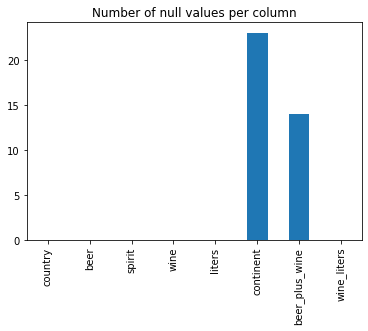

In [64]:
# Count the missing values in each column — remember that by default, axis=0.

print((drinks.isnull().sum()))

drinks.isnull().sum().plot(kind='bar');         # visually
plt.title('Number of null values per column');

<a id="drop_missing_values"></a>
### <font style='color: orange'>iii) Dropping Missing Values</font>

In [73]:
# Drop a row if ANY values are missing from any column — can be dangerous!
drinks.dropna()

,country,beer,spirit,wine,liters,continent,beer_plus_wine,wine_liters
1,Albania,89,132,54,4.9,EU,35.750000,58.9
2,Algeria,25,0,14,0.7,AF,inf,14.7
3,Andorra,245,138,312,12.4,EU,46.416667,324.4
4,Angola,217,57,45,5.9,AF,52.400000,50.9
6,Argentina,193,25,221,8.3,SA,51.750000,229.3
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,48.000000,10.7
189,Vietnam,111,2,1,2.0,AS,56.000000,3.0
190,Yemen,6,0,0,0.1,AS,inf,0.1
191,Zambia,32,19,4,2.5,AF,18.000000,6.5


In [74]:
drinks.isnull().sum()

country           0
beer              0
spirit            0
wine              0
liters            0
continent         0
beer_plus_wine    0
wine_liters       0
dtype: int64

In [72]:
# Drop a row only if ALL values are missing.
drinks.dropna(how='all')

,country,beer,spirit,wine,liters,continent,beer_plus_wine,wine_liters
1,Albania,89,132,54,4.9,EU,35.750000,58.9
2,Algeria,25,0,14,0.7,AF,inf,14.7
3,Andorra,245,138,312,12.4,EU,46.416667,324.4
4,Angola,217,57,45,5.9,AF,52.400000,50.9
6,Argentina,193,25,221,8.3,SA,51.750000,229.3
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,48.000000,10.7
189,Vietnam,111,2,1,2.0,AS,56.000000,3.0
190,Yemen,6,0,0,0.1,AS,inf,0.1
191,Zambia,32,19,4,2.5,AF,18.000000,6.5


<a id="fill_missing_values"></a>
### <font style='color: orange'>iv) Filling Missing Values</font>
Earlier we noticed that the continent North America (NA) does not appear in the `continent` column. pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value.

In [ ]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!  You can fill
# with any value you want

drinks.continent.fillna(value=0)

In [ ]:
# Modifies "drinks" in-place

drinks.continent.fillna(value='NA', inplace=True)

In [75]:
# Turn off the missing value filter — this is a better approach if you have a large file and know
# it doesn't contain NaNs!

drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols, na_filter=False)

In [76]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    193 non-null    object 
 1   beer       193 non-null    int64  
 2   spirit     193 non-null    int64  
 3   wine       193 non-null    int64  
 4   liters     193 non-null    float64
 5   continent  193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [77]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [78]:
drinks.isnull().sum()

country      0
beer         0
spirit       0
wine         0
liters       0
continent    0
dtype: int64

<a id="exercise-three"></a>
### <font style='color: green'>v) Exercise 3</font>

In [83]:
# Read ufo.csv into a DataFrame called "ufo"

ufo = pd.read_csv('data/ufo.csv')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [85]:
# Check the shape of the DataFrame
ufo.shape

(80543, 5)

In [ ]:
# What are the three most common colors reported?



In [89]:
ufo['Colors Reported'].value_counts().sort_values(ascending=False).head(3)

ORANGE    5216
RED       4809
GREEN     1897
Name: Colors Reported, dtype: int64

In [94]:
# Rename any columns with spaces so that they don't contain spaces.
col = ['City','ColorReported', 'ShapeReported', 'State', 'Time']
ufo.columns = col
ufo.head()

,City,ColorReported,ShapeReported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [100]:
# For reports in VA, what's the most common city?

ufo[ufo['State'] == 'VA']['City'].value_counts()

Virginia Beach                  110
Richmond                         92
Alexandria                       48
Roanoke                          35
Chesapeake                       33
                               ... 
Middletown                        1
Chesepeake Bay Bridge Tunnel      1
Richalnds                         1
Rockfish                          1
Chesaprake                        1
Name: City, Length: 397, dtype: int64

In [110]:
# Print a DataFrame containing only reports from Arlington, VA.

ufo[(ufo['State'] ==  'VA') & (ufo['City'] == 'Arlington')]

,City,ColorReported,ShapeReported,State,Time
202,Arlington,GREEN,OVAL,VA,7/13/1952 21:00
6300,Arlington,NaN,CHEVRON,VA,5/5/1990 21:40
10278,Arlington,NaN,DISK,VA,5/27/1997 15:30
14527,Arlington,NaN,OTHER,VA,9/10/1999 21:41
17984,Arlington,RED,DISK,VA,11/19/2000 22:00
21201,Arlington,GREEN,FIREBALL,VA,1/7/2002 17:45
22633,Arlington,NaN,LIGHT,VA,7/26/2002 1:15
22780,Arlington,NaN,LIGHT,VA,8/7/2002 21:00
25066,Arlington,NaN,CIGAR,VA,6/1/2003 22:34
27398,Arlington,NaN,VARIOUS,VA,12/13/2003 2:00


In [107]:
ufo[ufo['City'] == 'Arlington']

,City,ColorReported,ShapeReported,State,Time
201,Arlington,NaN,DISK,TX,7/7/1952 13:00
202,Arlington,GREEN,OVAL,VA,7/13/1952 21:00
2945,Arlington,NaN,TRIANGLE,TX,6/23/1975 21:00
2946,Arlington,NaN,TRIANGLE,TX,6/23/1975 21:00
2947,Arlington,NaN,TRIANGLE,TX,6/23/1975 21:00
...,...,...,...,...,...
78082,Arlington,BLUE,FIREBALL,MA,6/7/2014 22:03
79122,Arlington,NaN,CIRCLE,VA,7/7/2014 21:00
79395,Arlington,NaN,TRIANGLE,TX,7/18/2014 23:00
79715,Arlington,BLUE,CIRCLE,TN,8/2/2014 22:00


In [111]:

ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   City           80496 non-null  object
 1   ColorReported  17034 non-null  object
 2   ShapeReported  72141 non-null  object
 3   State          80543 non-null  object
 4   Time           80543 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [112]:
ufo.shape

(80543, 5)

In [114]:
# Count the number of missing values in each column.
ufo.isnull().sum()

City                47
ColorReported    63509
ShapeReported     8402
State                0
Time                 0
dtype: int64

In [115]:
# How many rows remain if you drop all rows with any missing values?
ufo.dropna()

,City,ColorReported,ShapeReported,State,Time
12,Belton,RED,SPHERE,SC,6/30/1939 20:00
19,Bering Sea,RED,OTHER,AK,4/30/1943 23:00
36,Portsmouth,RED,FORMATION,VA,7/10/1945 1:30
44,Blairsden,GREEN,SPHERE,CA,6/30/1946 19:00
82,San Jose,BLUE,CHEVRON,CA,7/15/1947 21:00
...,...,...,...,...,...
80524,Olympia,RED,LIGHT,WA,9/4/2014 21:10
80525,Iowa City,BLUE,LIGHT,IA,9/4/2014 21:11
80528,North Royalton,RED,TRIANGLE,OH,9/4/2014 21:30
80536,Wyoming,RED,DISK,PA,9/4/2014 23:00


<a id="split-apply-combine"></a>
# <font style='color: blue'>f) Grouping and Aggregating Data: Split-Apply-Combine</font>

- **Objective:** Group and aggregate data


 Split-Apply-Combine is a pattern for analyzing data. Suppose we want to find total beer consumption per country. Then we:

- **Split:** We group data by continent
- **Apply:** For each group, we apply the sum() function to find the total beer consumption for that continent
- **Combine:** We now combine the continent names with the sum()s to produce a summary of our findings



<img src="assets/split_apply_combine.png" style="width: 500px;">

_**Source**: Python for Data Analysis, Wes McKinney_

In [116]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [120]:
drinks.beer.sum()

20489

In [124]:
# For each continent, calculate the sum of all beer servings.

drinks.groupby('continent').sum('beer')

,beer,spirit,wine,liters
continent,,,,
AF,3258,866,862,159.4
AS,1630,2677,399,95.5
EU,8720,5965,6400,387.8
NA,3345,3812,564,137.9
OC,1435,935,570,54.1
SA,2101,1377,749,75.7


In [134]:
drinks['beer'].groupby('continent').sum()

KeyError: 'continent'

In [125]:
# For each continent, calculate the mean of all numeric columns.

drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [126]:
# For each continent, describe beer servings.

drinks.groupby('continent').beer.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
NA,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [139]:
drinks.groupby('continent').beer.agg(['mean']).sort_values('mean', ascending=False)

,mean
continent,
EU,193.777778
SA,175.083333
NA,145.434783
OC,89.687500
AF,61.471698
AS,37.045455


In [127]:
# Similar, but outputs a DataFrame and can be customized — "agg" allows you to aggregate results
# of Series functions

drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max'])


# sort output by mean values (descending), and round to 2 decimal places

round(drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max']).sort_values('mean', ascending=False),2)

,count,mean,min,max
continent,,,,
EU,45,193.78,0,361
SA,12,175.08,93,333
NA,23,145.43,1,285
OC,16,89.69,0,306
AF,53,61.47,0,376
AS,44,37.05,0,247


In [141]:
pd.set_option('display.max_columns', None)

In [140]:
# For each continent, describe all numeric columns.

# show all columns
pd.set_option('display.max_columns', None)

drinks.groupby('continent').describe().transpose()

# drinks.describe()

continent             AF          AS          EU          NA          OC  \
beer   count   53.000000   44.000000   45.000000   23.000000   16.000000   
       mean    61.471698   37.045455  193.777778  145.434783   89.687500   
       std     80.557816   49.469725   99.631569   79.621163   96.641412   
       min      0.000000    0.000000    0.000000    1.000000    0.000000   
       25%     15.000000    4.250000  127.000000   80.000000   21.000000   
       50%     32.000000   17.500000  219.000000  143.000000   52.500000   
       75%     76.000000   60.500000  270.000000  198.000000  125.750000   
       max    376.000000  247.000000  361.000000  285.000000  306.000000   
spirit count   53.000000   44.000000   45.000000   23.000000   16.000000   
       mean    16.339623   60.840909  132.555556  165.739130   58.437500   
       std     28.102794   84.362160   77.589115   94.993884   70.504817   
       min      0.000000    0.000000    0.000000   68.000000    0.000000   
       25%      1.000000    1.000000   81.000000  101.000000   18.000000   
       50%      3.000000   16.000000  122.000000  137.000000   37.000000   
       75%     19.000000   98.000000  173.000000  190.500000   65.250000   
       max    152.000000  326.000000  373.000000  438.000000  254.000000   
wine   count   53.000000   44.000000   45.000000   23.000000   16.000000   
       mean    16.264151    9.068182  142.222222   24.521739   35.625000   
       std     38.846419   21.667034   97.421738   28.266378   64.555790   
       min      0.000000    0.000000    0.000000    1.000000    0.000000   
       25%      1.000000    0.000000   59.000000    5.000000    1.000000   
       50%      2.000000    1.000000  128.000000   11.000000    8.500000   
       75%     13.000000    8.000000  195.000000   34.000000   23.250000   
       max    233.000000  123.000000  370.000000  100.000000  212.000000   
liters count   53.000000   44.000000   45.000000   23.000000   16.000000   
       mean     3.007547    2.170455    8.617778    5.995652    3.381250   
       std      2.647557    2.770239    3.358455    2.409353    3.345688   
       min      0.000000    0.000000    0.000000    2.200000    0.000000   
       25%      0.700000    0.100000    6.600000    4.300000    1.000000   
       50%      2.300000    1.200000   10.000000    6.300000    1.750000   
       75%      4.700000    2.425000   10.900000    7.000000    6.150000   
       max      9.100000   11.500000   14.400000   11.900000   10.400000   

continent             SA  
beer   count   12.000000  
       mean   175.083333  
       std     65.242845  
       min     93.000000  
       25%    129.500000  
       50%    162.500000  
       75%    198.000000  
       max    333.000000  
spirit count   12.000000  
       mean   114.750000  
       std     77.077440  
       min     25.000000  
       25%     65.750000  
       50%    108.500000  
       75%    148.750000  
       max    302.000000  
wine   count   12.000000  
       mean    62.416667  
       std     88.620189  
       min      1.000000  
       25%      3.000000  
       50%     12.000000  
       75%     98.500000  
       max    221.000000  
liters count   12.000000  
       mean     6.308333  
       std      1.531166  
       min      3.800000  
       25%      5.250000  
       50%      6.850000  
       75%      7.375000  
       max      8.300000

In [142]:
# For each continent, count the number of rows.

print((drinks.groupby('continent').continent.count()))
print((drinks.continent.value_counts()))   # should be the same

continent
AF    53
AS    44
EU    45
NA    23
OC    16
SA    12
Name: continent, dtype: int64
AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64


<a id="exercise-four"></a>
### <font style='color: green'>i) Exercise 4</font>

Use the "users" `DataFrame` or "users" file in the Data folder to complete the following.

In [144]:
users = pd.read_table('data/user.tbl', comment='#', delimiter='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [145]:
# Count the number of occurrences of each occupation in "users"
users.occupation.value_counts()


student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
doctor             7
homemaker          7
Name: occupation, dtype: int64

In [146]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [151]:
# For each occupation, calculate the mean age.

users.groupby('occupation').mean('age')

,user_id,age
occupation,,
administrator,430.949367,38.746835
artist,451.892857,31.392857
doctor,533.714286,43.571429
educator,466.905263,42.010526
engineer,456.328358,36.388060
entertainment,398.000000,29.222222
executive,422.312500,38.718750
healthcare,501.437500,41.562500
homemaker,443.000000,32.571429


In [156]:
# For each occupation, calculate the minimum and maximum ages.

users.head()
users.groupby('occupation')['age'].agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [159]:
# For each combination of occupation and gender, calculate the mean age.

users.head()

users.groupby(['occupation', 'gender'])['age'].agg('mean')

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

<a id="multiple-columns"></a>
# <font style='color: blue'>g) Selecting Multiple Columns and Filtering Rows</font>

In [160]:
# Reload data
import pandas as pd

ufo_data = 'data/ufo.csv'
ufo = pd.read_csv(ufo_data)

In [167]:
# Select multiple columns — yet another overload of the DataFrame indexing operator!

my_cols = ['City', 'State']     # Create a list of column names...
ufo[my_cols]                    # ...and use that list to select columns.

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
80538,Neligh,NE
80539,Uhrichsville,OH
80540,Tucson,AZ
80541,Orland park,IL


In [165]:
# Or, combine into a single step (this is a Python list inside of the Python index operator!).

ufo[['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
80538,Neligh,NE
80539,Uhrichsville,OH
80540,Tucson,AZ
80541,Orland park,IL


In [168]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [174]:
# "loc" locates the values from the first parameter (colon means "all rows" - remember string splicing), and the
# column "City"

ufo.loc[:,'City']

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
80538                  Neligh
80539            Uhrichsville
80540                  Tucson
80541             Orland park
80542                Loughman
Name: City, Length: 80543, dtype: object

In [171]:
ufo['City']

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
80538                  Neligh
80539            Uhrichsville
80540                  Tucson
80541             Orland park
80542                Loughman
Name: City, Length: 80543, dtype: object

<a id="loc"></a>
### <font style='color: orange'>i) Use `loc` to select columns by name</font>

In [175]:
# Select two columns

ufo.loc[:, ['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
80538,Neligh,NE
80539,Uhrichsville,OH
80540,Tucson,AZ
80541,Orland park,IL


In [176]:
# Select a range of columns — unlike Python ranges, pandas index ranges INCLUDE the final column in the range

ufo.loc[:, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE
80539,Uhrichsville,NaN,LIGHT,OH
80540,Tucson,RED BLUE,NaN,AZ
80541,Orland park,RED,LIGHT,IL


In [177]:
# "loc" can also filter rows by "name" (in this case, the index of row numbers).
# This is requesting Row 0, all columns

ufo.loc[0, :]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [178]:
# Rows 0, 1 & 2, all columns

ufo.loc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [182]:
# Rows 0, 1 & 2, and a range of columns

ufo.loc[0:2, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


<a id="iloc"></a>
### <font style='color: orange'>i) Use `iloc` to select columns by integer position</font>

In [184]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [183]:
# Remember that rows/columns use indices, so `iloc` lets you refer to indices via their index rather than value!
# All rows, for columns in position 0/3 (which is City/State)

ufo.iloc[:, [0, 3]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
80538,Neligh,NE
80539,Uhrichsville,OH
80540,Tucson,AZ
80541,Orland park,IL


In [185]:
# All rows, for columns in position 0/1/2/3
# Note here it is NOT INCLUDING 4 because this is an integer range, not a pandas index range!


ufo.iloc[:, 0:4]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE
80539,Uhrichsville,NaN,LIGHT,OH
80540,Tucson,RED BLUE,NaN,AZ
80541,Orland park,RED,LIGHT,IL


In [186]:
# Rows in position 0/1/2, all columns

ufo.iloc[0:3, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


<a id="joining-dataframes"></a>
# <font style='color: blue'>h) Joining (Merging) `DataFrames`</font>

When you want to join two DataFrames, you use `merge` or `concat`.  
- [pandas.concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html?highlight=concat#pandas.concat) stacks together objects along an axis

- [pandas.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html?highlight=merge#pandas.DataFrame.merge) connects rows in DataFrames based on one or more 'keys', similar to relational database `keys`

There are a number of different ways that data can be merged in pandas:

<img src="assets/join_types.png" style="width: 500px;">

_**Source**: https://www.datascienceexamples.com/joins-with-pandas/_

In [187]:
# Read in a dataset to use for merging (1 of 2)

import pandas as pd
movie_cols = ['movie_id', 'title']
movies_filename = 'data/movies.tbl'

movies = pd.read_table(
    movies_filename,
    sep='|',
    header=None,
    names=movie_cols,
    usecols=[0, 1],
    encoding='latin-1')

movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [222]:
movies.shape

(1682, 2)

In [223]:
ratings.shape

(100000, 4)

In [189]:
# Read in a different file as well, which we will merge with the first (2 of 2)

rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_filename = 'data/movie_ratings.tsv'

ratings = pd.read_table(ratings_filename, sep='\t', header=None, names=rating_cols)
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [201]:
movie_join = movies.merge(ratings, how= 'outer')
movie_join.head().sort_values('movie_id')

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [221]:
# Merge the "movies" and "ratings" datasets (an inner join on "movie_id").

movie_ratings = movies.merge(ratings, how='left')
movie_ratings.to_csv('test.csv')

In [203]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)
print(movie_join.shape)

(1682, 2)
(100000, 4)
(100000, 5)
(100000, 5)


<a id="other-features"></a>
# <font style='color: blue'>i) OPTIONAL: Other Commonly Used Features</font>

In [2]:
import pandas as pd
users = pd.read_csv('./data/user.tbl', sep='|')

In [6]:
users['lambda'] = users.age.apply(lambda age123: age123 >= 21)
users.info

<bound method DataFrame.info of      user_id  age gender     occupation zip_code  lambda
0          1   24      M     technician    85711    True
1          2   53      F          other    94043    True
2          3   23      M         writer    32067    True
3          4   24      M     technician    43537    True
4          5   33      F          other    15213    True
..       ...  ...    ...            ...      ...     ...
938      939   26      F        student    33319    True
939      940   32      M  administrator    02215    True
940      941   20      M        student    97229   False
941      942   48      F      librarian    78209    True
942      943   22      M        student    77841    True

[943 rows x 6 columns]>

In [205]:
# Apply an arbitrary function to each value of a pandas column, storing the result in a new column.

# This shows an application of a `lambda`, a very useful one line function you can use

users['under30'] = users.age.apply(lambda age: age < 30)

users

,user_id,age,gender,occupation,zip_code,under30
0,1,24,M,technician,85711,True
1,2,53,F,other,94043,False
2,3,23,M,writer,32067,True
3,4,24,M,technician,43537,True
4,5,33,F,other,15213,False
...,...,...,...,...,...,...
938,939,26,F,student,33319,True
939,940,32,M,administrator,02215,False
940,941,20,M,student,97229,True
941,942,48,F,librarian,78209,False


In [10]:
users['under30male'] = users.apply(lambda row: row.age > 30 and row.gender == 'M', axis=1)

In [11]:
# Apply an arbitrary function to each row of a DataFrame, storing the result in a new column.
# (Remember that, by default, axis=0. Since we want to go row by row, we set axis=1.)

users['under30male'] = users.apply(lambda row: row.age < 30 and row.gender == 'M', axis=1)

users.head()

,user_id,age,gender,occupation,zip_code,lambda,under30male
0,1,24,M,technician,85711,True,True
1,2,53,F,other,94043,True,False
2,3,23,M,writer,32067,True,True
3,4,24,M,technician,43537,True,True
4,5,33,F,other,15213,True,False


In [12]:
# Map existing values to a different set of values.

users['is_male'] = users.gender.map({'F':0, 'M':1})
users.head()

,user_id,age,gender,occupation,zip_code,lambda,under30male,is_male
0,1,24,M,technician,85711,True,True,1
1,2,53,F,other,94043,True,False,0
2,3,23,M,writer,32067,True,True,1
3,4,24,M,technician,43537,True,True,1
4,5,33,F,other,15213,True,False,0


In [13]:
# Replace all instances of a value in a column (must match entire value).

ufo.State.replace('Fl', 'FL', inplace=True)

NameError: name 'ufo' is not defined

In [14]:
# String methods are accessed via "str".

ufo.State.str.upper() # Converts to upper case


# check for a substring:

ufo['Colors Reported'].str.contains('RED', na='False') 

NameError: name 'ufo' is not defined

In [18]:
ufo.head(2)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00


In [19]:
# Convert a string to the datetime format (this is often slow — consider doing it in the "read_csv()" method.)
ufo = pd.read_csv('data/ufo.csv')
ufo['Time'] = pd.to_datetime(ufo['Time'])
ufo.Time.dt.hour                        # Datetime format exposes convenient attributes
(ufo.Time.max() - ufo.Time.min()).days  # Also allows you to do datetime "math"

30776

In [20]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [22]:
# Set and then remove an index

ufo.set_index('Time', inplace=True)
#ufo.reset_index(inplace=True)

ufo.head()

,City,Colors Reported,Shape Reported,State
Time,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO
1931-06-01 13:00:00,Abilene,NaN,DISK,KS
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY


In [23]:
# Change the datatype of a column.

drinks['beer'] = drinks.beer.astype('float')

NameError: name 'drinks' is not defined

In [28]:
# Create dummy variables for "continent" and exclude first dummy column.

drinks = pd.read_csv('data/drinks.csv')

continent_dummies = pd.get_dummies(drinks.continent, prefix='cont').iloc[:, 1:]
continent_dummies.

,cont_AS,cont_EU,cont_OC,cont_SA
0,1,0,0,0
1,0,1,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
188,0,0,0,1
189,1,0,0,0
190,1,0,0,0
191,0,0,0,0


In [30]:
# Concatenate two DataFrames (axis=0 for rows, axis=1 for columns).

drinks = pd.concat([drinks, continent_dummies], axis=1)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,cont_AS,cont_EU,cont_OC,cont_SA,cont_AS,cont_EU,cont_OC,cont_SA
0,Afghanistan,0,0,0,0.0,AS,1,0,0,0,1,0,0,0
1,Albania,89,132,54,4.9,EU,0,1,0,0,0,1,0,0
2,Algeria,25,0,14,0.7,AF,0,0,0,0,0,0,0,0
3,Andorra,245,138,312,12.4,EU,0,1,0,0,0,1,0,0
4,Angola,217,57,45,5.9,AF,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,0,0,0,1,0,0,0,1
189,Vietnam,111,2,1,2.0,AS,1,0,0,0,1,0,0,0
190,Yemen,6,0,0,0.1,AS,1,0,0,0,1,0,0,0
191,Zambia,32,19,4,2.5,AF,0,0,0,0,0,0,0,0


<a id="uncommon-features"></a>
# <font style='color: blue'>j) OPTIONAL: Other Less-Used Features of Pandas</font>

In [ ]:
# Detecting duplicate rows

users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # Count of duplicates
users[users.duplicated()]   # Only show duplicates
users.drop_duplicates()     # Drop duplicate rows
users.age.duplicated()      # Check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # Specify columns for finding duplicates

In [32]:
drinks.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,cont_AS,cont_EU,cont_OC,cont_SA,cont_AS,cont_EU,cont_OC,cont_SA
0,Afghanistan,0,0,0,0.0,AS,1,0,0,0,1,0,0,0
1,Albania,89,132,54,4.9,EU,0,1,0,0,0,1,0,0
2,Algeria,25,0,14,0.7,AF,0,0,0,0,0,0,0,0


In [38]:
# Convert a range of values into descriptive groups.

drinks['beer_level'] = 'low'    # Initially set all values to "low"
drinks.loc[drinks.beer_servings.between(101, 200), 'beer_level'] = 'med'     # Change 101-200 to "med"
drinks.loc[drinks.beer_servings.between(201, 400), 'beer_level'] = 'high'    # Change 201-400 to "high"
drinks.drop('continent', axis=1)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,cont_AS,cont_EU,cont_OC,cont_SA,cont_AS,cont_EU,cont_OC,cont_SA,beer_level
0,Afghanistan,0,0,0,0.0,1,0,0,0,1,0,0,0,low
1,Albania,89,132,54,4.9,0,1,0,0,0,1,0,0,low
2,Algeria,25,0,14,0.7,0,0,0,0,0,0,0,0,low
3,Andorra,245,138,312,12.4,0,1,0,0,0,1,0,0,high
4,Angola,217,57,45,5.9,0,0,0,0,0,0,0,0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,0,0,0,1,0,0,0,1,high
189,Vietnam,111,2,1,2.0,1,0,0,0,1,0,0,0,med
190,Yemen,6,0,0,0.1,1,0,0,0,1,0,0,0,low
191,Zambia,32,19,4,2.5,0,0,0,0,0,0,0,0,low


In [39]:
# Display a cross-tabulation of two Series.

pd.crosstab(drinks.continent, drinks.beer_level)

beer_level,high,low,med
continent,,,
AF,4,45,4
AS,1,40,3
EU,24,9,12
OC,3,11,2
SA,3,1,8


In [40]:
# Convert "beer_level" into the "category" datatype.

drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # Sorts by the categorical ordering (low to high)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,cont_AS,cont_EU,cont_OC,cont_SA,cont_AS,cont_EU,cont_OC,cont_SA,beer_level
0,Afghanistan,0,0,0,0.0,AS,1,0,0,0,1,0,0,0,low
102,Malaysia,13,4,0,0.3,AS,1,0,0,0,1,0,0,0,low
103,Maldives,0,0,0,0.0,AS,1,0,0,0,1,0,0,0,low
104,Mali,5,1,1,0.6,AF,0,0,0,0,0,0,0,0,low
106,Marshall Islands,0,0,0,0.0,OC,0,0,1,0,0,0,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,Belize,263,114,8,6.8,NaN,0,0,0,0,0,0,0,0,high
121,New Zealand,203,79,175,9.3,OC,0,0,1,0,0,0,1,0,high
16,Belgium,295,84,212,10.5,EU,0,1,0,0,0,1,0,0,high
117,Namibia,376,3,1,6.8,AF,0,0,0,0,0,0,0,0,high


In [ ]:
# Limit which rows are read when reading in a file — useful for large files!

pd.read_csv('data/drinks.csv', nrows=10)           # Only read first 10 rows
pd.read_csv('data/drinks.csv', skiprows=[1, 2])    # Skip the first two rows of data

In [ ]:
# Write a DataFrame out to a .csv

drinks.to_csv('drinks_updated.csv')                 # Index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # Ignore index

In [41]:
# Create a DataFrame from a dictionary.

pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

,capital,state
0,Montgomery,AL
1,Juneau,AK
2,Phoenix,AZ


In [ ]:
# Create a DataFrame from a list of lists.

pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

In [ ]:
# Randomly sample a DataFrame.

import numpy as np
mask = np.random.rand(len(drinks)) < 0.66   # Create a Series of Booleans
train = drinks[mask]                        # Will contain around 66% of the rows
test = drinks[~mask]                        # Will contain the remaining rows

In [ ]:
# Change the maximum number of rows and columns printed ('None' means unlimited).

pd.set_option('max_rows', None)     # Default is 60 rows
pd.set_option('max_columns', None)  # Default is 20 columns
print(drinks)

In [ ]:
# Reset options to defaults.

pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [ ]:
# Change the options temporarily (settings are restored when you exit the "with" block).

with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

<a id="summary"></a>
# <font style='color: blue'>k) Summary</font>

Believe it or not, we've barely touched the surface of everything that pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Grouping and aggregating data using Split-apply-combine (this one takes some practice!)

### Additional Resources
- [pandas Documentation](https://pandas.pydata.org/docs/) very comprehensive and easy to use
- [Python For Data Analysis Book](https://wesmckinney.com/pages/book.html) textbook by the creator of pandas on how to use it
- [pandas resources from Data School](https://www.dataschool.io/best-python-pandas-resources/) great data science website; includes Common Excel Tasks Demonstrated in Pandas
- [pandas documentation on Grouping](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#grouping)
- [StackOverflow detailed answer on merging Dataframes in pandas](https://stackoverflow.com/questions/53645882/pandas-merging-101)